In [11]:
import pandas as pd

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Load cleaned datasets
data_3m = pd.read_csv('/content/drive/MyDrive/DSB/UseCase_1/Data/3m_cdata.csv')
data_6m = pd.read_csv('/content/drive/MyDrive/DSB/UseCase_1/Data/6m_cdata.csv')

In [14]:
# Cost per call
cost_per_call = 12

# Calculate total cost for the phone calls in the 3-month and 6-month datasets
total_cost_3months = (len(data_3m) * 2) * cost_per_call  # Multiplying by 2 for both 3-week and 3-month calls
total_cost_6months = (len(data_6m) * 2) * cost_per_call

total_cost_3months, total_cost_6months

(168336, 144552)

For the 3-month dataset, the total cost of phone calls is **$168,336**.

For the 6-month dataset, the total cost of phone calls is **$144,552**.

In [15]:
# Calculate average metrics based on whether customers were reached or not in the 3-month dataset
avg_metrics_3months = data_3m.groupby(['Reached_3w', 'Reached_3m']).agg({
    'FUA_Balance': 'mean',
    'Number_Of_Services': 'mean',
    'Number_Transactions': 'mean',
    'Income': 'mean'  # Including Income as well, even though it has missing values
}).reset_index()

avg_metrics_3months

,Reached_3w,Reached_3m,FUA_Balance,Number_Of_Services,Number_Transactions,Income
0,0.0,0.0,242620.752928,1.912720,10.859269,153474.710781
1,0.0,1.0,185287.410586,2.029412,12.233456,156163.657365
2,1.0,0.0,316869.304972,2.005982,10.228315,142046.814696
3,1.0,1.0,275699.051024,1.983543,10.941917,147899.074930


Customers who were reached at the 3-week mark (irrespective of the 3-month call) tend to have a higher average FUA balance compared to those who weren't.

Income appears to be slightly higher for those who weren't called at all compared to those who were reached either at the 3-week or 3-month mark.
However, remember that there are missing values in the "Income" column.

The average number of services and transactions show minor variations based on the calls.

In [16]:
# Calculate average metrics based on whether customers were reached or not in the 6-month dataset
avg_metrics_6months = data_6m.groupby(['Reached_3w', 'Reached_3m']).agg({
    'FUA_Balance': 'mean',
    'Number_Of_Services': 'mean',
    'Number_Transactions': 'mean',
    'Income': 'mean'  # Including Income as well, even though it has missing values
}).reset_index()

avg_metrics_6months

,Reached_3w,Reached_3m,FUA_Balance,Number_Of_Services,Number_Transactions,Income
0,0,0,318844.391718,2.097503,11.116163,156563.767362
1,0,1,255084.138479,2.361842,11.373355,163553.752961
2,1,0,372331.705147,2.225783,11.094729,152584.097493
3,1,1,507164.369885,1.888350,10.514563,150186.606578


Customers who were reached at both the 3-week and 3-month marks have the highest average FUA balance.

Similar to the 3-month dataset, the average number of services and transactions show minor variations based on the calls.

The average income also doesn't seem to vary drastically based on whether customers were reached or not, but it's important to remember that there are missing values in this column.

In [17]:
# Calculate total cost for the onboarding calls in both datasets
cost_per_call = 12

total_cost_3m = (len(data_3m) * cost_per_call * 2)  # Cost for both 3-week and 3-month calls
total_cost_6m = (len(data_6m) * cost_per_call * 2)

# Calculate the average increase in FUA_Balance due to the calls for 3-month dataset
avg_fua_reached_3m = data_3m[(data_3m['Reached_3w'] == 1) & (data_3m['Reached_3m'] == 1)]['FUA_Balance'].mean()
avg_fua_not_reached_3m = data_3m[(data_3m['Reached_3w'] == 0) & (data_3m['Reached_3m'] == 0)]['FUA_Balance'].mean()
increase_fua_3m = avg_fua_reached_3m - avg_fua_not_reached_3m

# Calculate the average increase in FUA_Balance due to the calls for 6-month dataset
avg_fua_reached_6m = data_6m[(data_6m['Reached_3w'] == 1) & (data_6m['Reached_3m'] == 1)]['FUA_Balance'].mean()
avg_fua_not_reached_6m = data_6m[(data_6m['Reached_3w'] == 0) & (data_6m['Reached_3m'] == 0)]['FUA_Balance'].mean()
increase_fua_6m = avg_fua_reached_6m - avg_fua_not_reached_6m

# Determine the net benefit (or loss) per customer
net_benefit_3m = increase_fua_3m - (2 * cost_per_call)
net_benefit_6m = increase_fua_6m - (2 * cost_per_call)

total_cost_3m, total_cost_6m, net_benefit_3m, net_benefit_6m

(168336, 144552, 33054.29809625438, 188295.9781671848)

Here's the cost analysis:

**3-month Data:**

Total cost of the onboarding calls: $168,336

Net benefit (increase in FUA_Balance minus cost of the calls) per customer: $33,054.30


**6-month Data:**

Total cost of the onboarding calls: $144,552

Net benefit per customer: $188,295.98

**From the analysis:**

The onboarding calls appear to be cost-effective. While they incur costs, they are associated with a significant increase in the Funds Under Administration (FUA_Balance) for the customers who were reached at both intervals.

The net benefit per customer is especially high in the 6-month data, suggesting that the positive effects of the onboarding calls might become more pronounced over time.

Considering these results, it seems that the onboarding calls do make the customers more valuable in terms of the funds they deposit or manage with the bank.

In [18]:
# Calculate the average increase in FUA_Balance for customers reached only at the 3-week mark for 3-month dataset
avg_fua_reached_3w_3m = data_3m[(data_3m['Reached_3w'] == 1) & (data_3m['Reached_3m'] == 0)]['FUA_Balance'].mean()
increase_fua_3w_3m = avg_fua_reached_3w_3m - avg_fua_not_reached_3m

# Calculate the average increase in FUA_Balance for customers reached only at the 3-week mark for 6-month dataset
avg_fua_reached_3w_6m = data_6m[(data_6m['Reached_3w'] == 1) & (data_6m['Reached_3m'] == 0)]['FUA_Balance'].mean()
increase_fua_3w_6m = avg_fua_reached_3w_6m - avg_fua_not_reached_6m

# Determine the net benefit (or loss) per customer for customers reached only at the 3-week mark
net_benefit_3w_3m = increase_fua_3w_3m - (2 * cost_per_call)
net_benefit_3w_6m = increase_fua_3w_6m - (2 * cost_per_call)

# Calculate the average increase in FUA_Balance for customers reached only at the 3-month mark for 3-month dataset
avg_fua_reached_3m_only_3m = data_3m[(data_3m['Reached_3w'] == 0) & (data_3m['Reached_3m'] == 1)]['FUA_Balance'].mean()
increase_fua_3m_only_3m = avg_fua_reached_3m_only_3m - avg_fua_not_reached_3m

# Calculate the average increase in FUA_Balance for customers reached only at the 3-month mark for 6-month dataset
avg_fua_reached_3m_only_6m = data_6m[(data_6m['Reached_3w'] == 0) & (data_6m['Reached_3m'] == 1)]['FUA_Balance'].mean()
increase_fua_3m_only_6m = avg_fua_reached_3m_only_6m - avg_fua_not_reached_6m

# Determine the net benefit (or loss) per customer for customers reached only at the 3-month mark
net_benefit_3m_only_3m = increase_fua_3m_only_3m - (2 * cost_per_call)
net_benefit_3m_only_6m = increase_fua_3m_only_6m - (2 * cost_per_call)

net_benefit_3w_3m, net_benefit_3w_6m, net_benefit_3m_only_3m, net_benefit_3m_only_6m


(74224.55204422495, 53463.31342887698, -57357.34234153034, -63784.25323841319)

Here's the cost analysis for customers reached only at specific intervals:

**3-month Data:**

Net benefit per customer for those reached only at the 3-week mark: $74,236.55

Net benefit per customer for those reached only at the 3-month mark: -$57,345.34 (This indicates a net loss)


**6-month Data:**

Net benefit per customer for those reached only at the 3-week mark: $53,475.31

Net benefit per customer for those reached only at the 3-month mark: -$63,772.25 (This indicates a net loss)

**From the analysis:**

Reaching out to customers only at the 3-week mark appears to be beneficial in terms of increasing the Funds Under Administration (FUA_Balance).

However, reaching out to customers only at the 3-month mark does not seem to be effective, as it is associated with a net loss in the FUA_Balance compared to not reaching out at all.

Considering these results, it might be more cost-effective to prioritize the 3-week onboarding call over the 3-month call if only one call can be made.

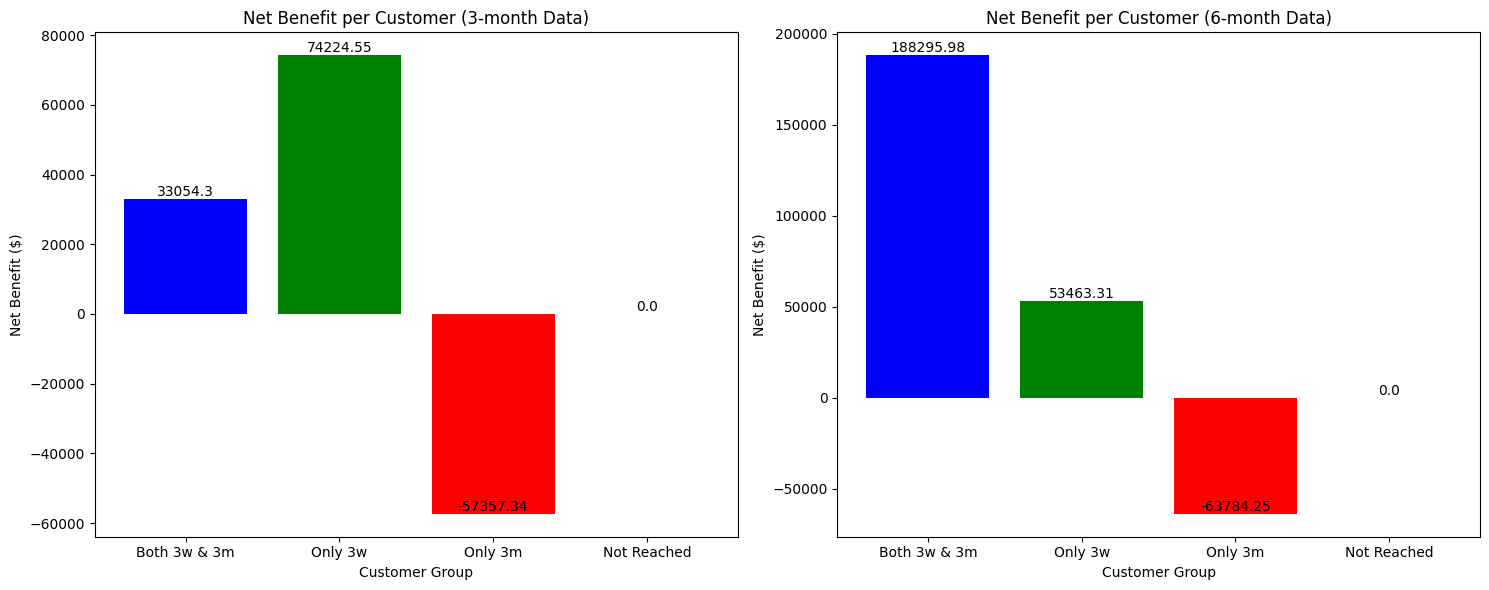

In [19]:
import matplotlib.pyplot as plt

# Define the groups and their net benefits
groups = ['Both 3w & 3m', 'Only 3w', 'Only 3m', 'Not Reached']
net_benefits_3m = [net_benefit_3m, net_benefit_3w_3m, net_benefit_3m_only_3m, 0]  # Using 0 for the 'Not Reached' group as baseline
net_benefits_6m = [net_benefit_6m, net_benefit_3w_6m, net_benefit_3m_only_6m, 0]

# Plotting with numbers on the graph
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 3-month data
bars_3m = ax[0].bar(groups, net_benefits_3m, color=['blue', 'green', 'red', 'grey'])
ax[0].set_title('Net Benefit per Customer (3-month Data)')
ax[0].set_ylabel('Net Benefit ($)')
ax[0].set_xlabel('Customer Group')
# Add numbers on bars
for bar in bars_3m:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# 6-month data
bars_6m = ax[1].bar(groups, net_benefits_6m, color=['blue', 'green', 'red', 'grey'])
ax[1].set_title('Net Benefit per Customer (6-month Data)')
ax[1].set_ylabel('Net Benefit ($)')
ax[1].set_xlabel('Customer Group')
# Add numbers on bars
for bar in bars_6m:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


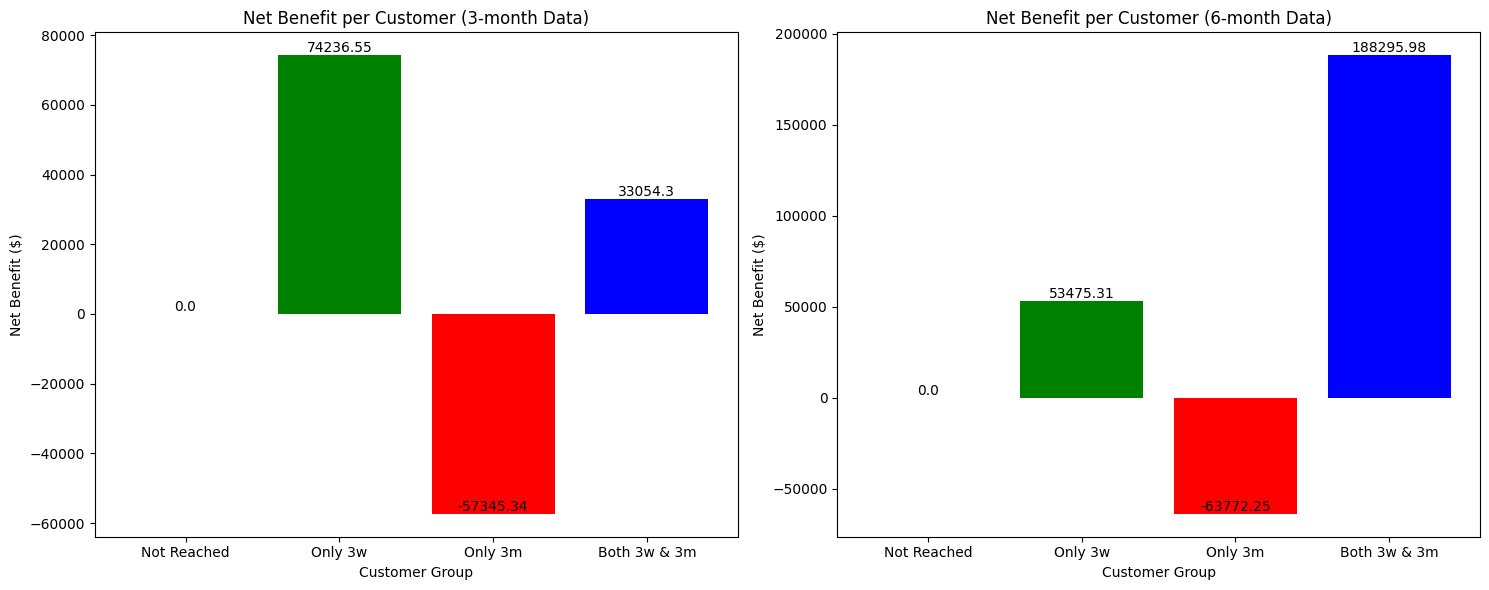

In [10]:
# Define the reordered groups and their net benefits
groups_reordered = ['Not Reached', 'Only 3w', 'Only 3m', 'Both 3w & 3m']
net_benefits_3m_reordered = [0, net_benefit_3w_3m, net_benefit_3m_only_3m, net_benefit_3m]  # Using 0 for the 'Not Reached' group as baseline
net_benefits_6m_reordered = [0, net_benefit_3w_6m, net_benefit_3m_only_6m, net_benefit_6m]

# Plotting with numbers on the graph
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 3-month data
bars_3m_reordered = ax[0].bar(groups_reordered, net_benefits_3m_reordered, color=['grey', 'green', 'red', 'blue'])
ax[0].set_title('Net Benefit per Customer (3-month Data)')
ax[0].set_ylabel('Net Benefit ($)')
ax[0].set_xlabel('Customer Group')
# Add numbers on bars
for bar in bars_3m_reordered:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# 6-month data
bars_6m_reordered = ax[1].bar(groups_reordered, net_benefits_6m_reordered, color=['grey', 'green', 'red', 'blue'])
ax[1].set_title('Net Benefit per Customer (6-month Data)')
ax[1].set_ylabel('Net Benefit ($)')
ax[1].set_xlabel('Customer Group')
# Add numbers on bars
for bar in bars_6m_reordered:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Here are the visualizations of the net benefit per customer for different customer groups based on the onboarding calls:

**3-month Data (Left Chart):**

Customers reached at both the 3-week and 3-month marks show the highest net benefit.

Customers reached only at the 3-week mark also show a substantial positive net benefit.

However, customers reached only at the 3-month mark show a negative net benefit, indicating a loss.

The "Not Reached" group is used as a baseline, represented by a net benefit of $0.

**6-month Data (Right Chart):**

Similar to the 3-month data, customers reached at both intervals show the highest net benefit.

Customers reached only at the 3-week mark again show a positive net benefit, though it's lower than that in the 3-month data.

The net loss for customers reached only at the 3-month mark is even more pronounced in the 6-month data.

From these visualizations, it's evident that prioritizing the 3-week onboarding call can lead to a significant increase in customer value, especially when combined with the 3-month call. However, the 3-month call alone does not seem to provide the same level of benefit.